In [ ]:
try:
    # %tensorflow_version  only  exists  in  Colab.
    %tensorflow_version  2.x
except  Exception:
    pass

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11954318525148653116, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16134068617725900283
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

# Exe. 1

In [ ]:
from keras.datasets import cifar10

(trainX, trainy), (testX, testy) = cifar10.load_data()

# Exe. 2

In [ ]:
trainX = trainX.astype(float) / 255
testX = testX.astype(float) / 255

In [ ]:
trainX[0].shape

(32, 32, 3)

# Exe. 3

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

NET1 = Sequential([
    Conv2D(filters=32, kernel_size=3, strides=1, activation='relu', data_format='channels_last', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Exe. 4

In [ ]:
def nb_parameters_conv(layer):
    return (layer.kernel_size[0] * layer.kernel_size[1] * layer.input_shape[3] + 1) * layer.filters
def output_shape(layer):
    N = layer.input_shape[1:]
    F = layer.kernel_size if type(layer) == Conv2D else layer.pool_size
    S = layer.strides
    shape = []
    for i in range(len(F)):
        shape.append((N[i] - F[i]) / S[i] + 1)
    return shape

In [ ]:
for i, layer in enumerate(NET1.layers):
    print(f"Layer {i}")
    layer_type = type(layer)
    if  layer_type == Conv2D:
        print(f"    Number paramers: {nb_parameters_conv(layer)}")
    if layer_type in (Conv2D, MaxPooling2D):
        print(f"    Output Shape: {output_shape(layer)}")

Layer 0
    Number paramers: 896
    Output Shape: [30.0, 30.0]
Layer 1
    Output Shape: [15.0, 15.0]
Layer 2
    Number paramers: 18496
    Output Shape: [13.0, 13.0]
Layer 3
    Output Shape: [6.5, 6.5]
Layer 4
    Number paramers: 36928
    Output Shape: [4.0, 4.0]
Layer 5
    Output Shape: [2.0, 2.0]
Layer 6
Layer 7
Layer 8


In [ ]:
NET1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

# Exe. 5

In [ ]:
NET1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Exe. 6

In [ ]:

history =  NET1.fit(trainX,
                    trainy,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=20,
                   )

Epoch 1/20
313/313 [==============================] - 3s 7ms/step - loss: 1.9250 - accuracy: 0.2743 - val_loss: 1.4361 - val_accuracy: 0.4849
Epoch 2/20
313/313 [==============================] - 2s 7ms/step - loss: 1.3786 - accuracy: 0.5052 - val_loss: 1.2571 - val_accuracy: 0.5507
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 1.1941 - accuracy: 0.5732 - val_loss: 1.1853 - val_accuracy: 0.5829
Epoch 4/20
313/313 [==============================] - 2s 6ms/step - loss: 1.0824 - accuracy: 0.6164 - val_loss: 1.1286 - val_accuracy: 0.6006
Epoch 5/20
313/313 [==============================] - 2s 6ms/step - loss: 0.9915 - accuracy: 0.6499 - val_loss: 1.0229 - val_accuracy: 0.6424
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 0.9475 - accuracy: 0.6660 - val_loss: 0.9836 - val_accuracy: 0.6566
Epoch 7/20
313/313 [==============================] - 2s 6ms/step - loss: 0.8686 - accuracy: 0.6939 - val_loss: 0.9560 - val_accuracy: 0.6700
Epoch 

# Exe. 7

In [ ]:
evaluation = NET1.evaluate(testX, testy, return_dict=True)

313/313 [==============================] - 1s 2ms/step - loss: 0.9780 - accuracy: 0.7052


In [ ]:
evaluation

{'accuracy': 0.7052000164985657, 'loss': 0.9779629111289978}

# Exe. 8

In [ ]:
import numpy as np
def predict(output):
    return np.argmax(output)

In [ ]:
predicted_output = NET1.predict(testX)
print(f"Predicted label: {predict(predicted_output[0])}")
print(f"True label: {testy[0]}")

Predicted label: 3
True label: [3]


# Exe. 9

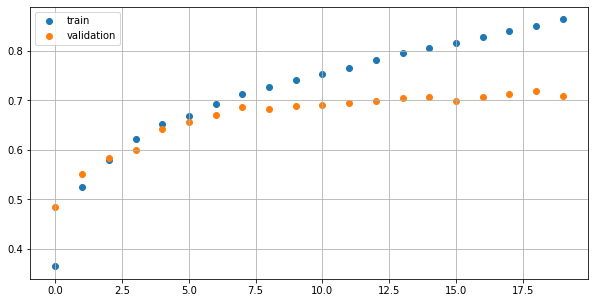

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 5)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.scatter(range(len(accuracy)), accuracy, label='train')
plt.scatter(range(len(val_accuracy)), val_accuracy, label='validation')
plt.legend()
plt.grid()

We can see that the model takes only into account the train set when adjustring its parameters. Indeed the model seems to start to overfeet after 10 epochs.

# Exe. 10

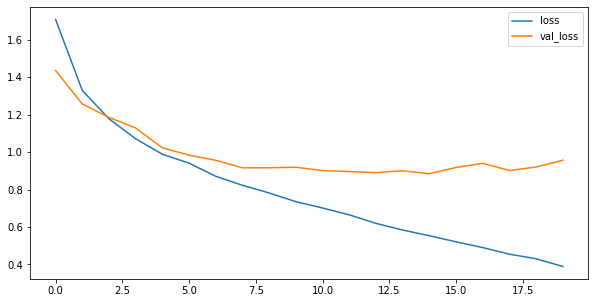

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(len(loss)), loss, label='loss')
plt.plot(range(len(val_loss)), val_loss, label='val_loss')
plt.legend()

Same as the previous observation it seems that overfitting happens after 10 epochs.

# Exe. 11

In [ ]:
NET2 = Sequential([
    Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', data_format='channels_last', input_shape=(32, 32, 3)),
    Conv2D(filters=64, kernel_size=5, strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=5, strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Exe. 12

In [ ]:
NET2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 64)          102464    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)              

In [ ]:
for i, layer in enumerate(NET2.layers):
    print(f"Layer {i}")
    layer_type = type(layer)
    if  layer_type == Conv2D:
        print(f"    Number paramers: {nb_parameters_conv(layer)}")
    if layer_type in (Conv2D, MaxPooling2D):
        print(f"    Output Shape: {output_shape(layer)}")

Layer 0
    Number paramers: 2432
    Output Shape: [28.0, 28.0]
Layer 1
    Number paramers: 51264
    Output Shape: [24.0, 24.0]
Layer 2
    Output Shape: [12.0, 12.0]
Layer 3
    Number paramers: 102464
    Output Shape: [8.0, 8.0]
Layer 4
    Output Shape: [4.0, 4.0]
Layer 5
Layer 6
Layer 7


# Exe. 13

In [ ]:
NET2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Exe. 14

In [ ]:
history_2 = NET2.fit(trainX,
                        trainy,
                        validation_split=0.2,
                        batch_size=128,
                        epochs=20
                        )   

Epoch 1/20
313/313 [==============================] - 4s 11ms/step - loss: 1.8754 - accuracy: 0.3111 - val_loss: 1.4034 - val_accuracy: 0.4948
Epoch 2/20
313/313 [==============================] - 3s 10ms/step - loss: 1.3314 - accuracy: 0.5184 - val_loss: 1.2128 - val_accuracy: 0.5749
Epoch 3/20
313/313 [==============================] - 3s 10ms/step - loss: 1.1070 - accuracy: 0.6076 - val_loss: 1.0778 - val_accuracy: 0.6241
Epoch 4/20
313/313 [==============================] - 3s 10ms/step - loss: 0.9559 - accuracy: 0.6638 - val_loss: 1.0165 - val_accuracy: 0.6471
Epoch 5/20
313/313 [==============================] - 3s 10ms/step - loss: 0.8590 - accuracy: 0.6972 - val_loss: 0.9392 - val_accuracy: 0.6737
Epoch 6/20
313/313 [==============================] - 3s 10ms/step - loss: 0.7519 - accuracy: 0.7353 - val_loss: 0.9105 - val_accuracy: 0.6834
Epoch 7/20
313/313 [==============================] - 3s 10ms/step - loss: 0.6872 - accuracy: 0.7569 - val_loss: 0.8928 - val_accuracy: 0.6965

# Exe. 15

In [ ]:
evaluation = NET2.evaluate(testX, testy, return_dict=True)
predicted_output = NET2.predict(testX)
print(f"Predicted label: {predict(predicted_output[0])}")
print(f"True label: {testy[0]}")
print(evaluation)

313/313 [==============================] - 1s 3ms/step - loss: 1.8646 - accuracy: 0.6819
Predicted label: 3
True label: [3]
{'loss': 1.8646172285079956, 'accuracy': 0.6819000244140625}


# Exe. 16

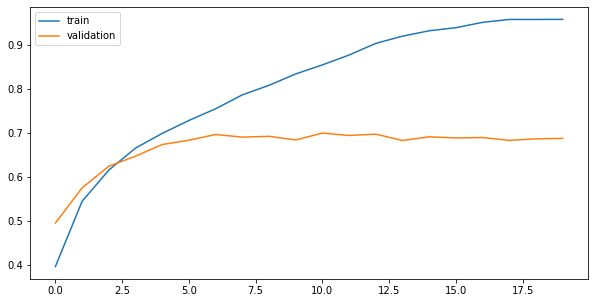

In [ ]:
accuracy = history_2.history['accuracy']
val_accuracy = history_2.history['val_accuracy']
plt.plot(range(len(accuracy)), accuracy, label='train')
plt.plot(range(len(val_accuracy)), val_accuracy, label='validation')
plt.legend()

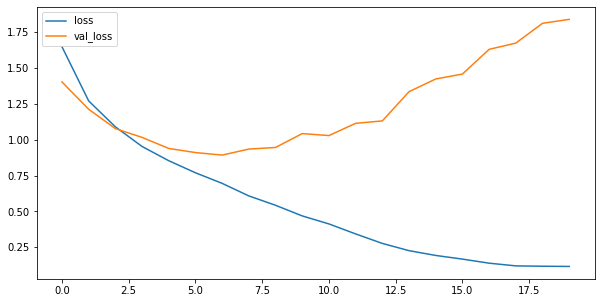

In [ ]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
plt.plot(range(len(loss)), loss, label='loss')
plt.plot(range(len(val_loss)), val_loss, label='val_loss')
plt.legend()

We can see that the accuracy and the loss diverge after arround 7 epochs. It also diverge with more "intensity" than the previous model.

# Exe. 17

In [ ]:
from keras.layers import Dropout
from keras.regularizers import l2

NET3 = Sequential([
    Conv2D(filters=96, kernel_size=3, strides=1, activation='relu', data_format='channels_last', input_shape=(32, 32, 3)),
    Conv2D(filters=96, kernel_size=3, strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.5),
    Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'),
    Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'),
    Conv2D(filters=128, kernel_size=3, strides=1, activation='relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Dropout(0.5),
    Flatten(),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.0005)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.0005)),
    Dense(10, activation='softmax', kernel_regularizer=l2(0.0005))
])

ValueError: ignored